# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [53]:
# conda install -c conda-forge ta-lib

In [54]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [55]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [56]:
start_date = dt.datetime(2018, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'WMT'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2018-03-01,90.169998,90.180000,87.709999,89.080002,80.964165,18909600
2018-03-02,87.269997,88.900002,87.239998,88.769997,80.682404,19043400
2018-03-05,88.139999,90.500000,88.070000,89.980003,81.782166,13383200
2018-03-06,90.349998,90.500000,88.629997,89.059998,80.945961,11054700
2018-03-07,87.980003,88.529999,87.339996,87.739998,79.746231,11453000
...,...,...,...,...,...,...
2023-02-22,146.770004,147.570007,142.759995,144.240005,143.651230,9948000
2023-02-23,144.369995,144.369995,140.710007,142.089996,141.509995,7340400
2023-02-24,140.839996,142.740005,139.529999,142.470001,141.888458,6874500
2023-02-27,142.710007,143.089996,140.660004,141.440002,140.862656,5549100


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2018-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8+ KB


In [58]:
data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Open,1258.00000,123.36599,20.77222,81.96000,103.83500,128.15500,141.50000,160.25000
High,1258.00000,124.47754,20.92718,82.52000,104.90000,129.86000,142.72000,160.77000
Low,1258.00000,122.34723,20.59376,81.78000,102.99750,126.68000,140.43500,159.07001
Close,1258.00000,123.40161,20.73740,82.40000,104.11750,128.15000,141.64500,159.87000
Adj Close,1258.00000,118.67489,22.31357,75.81390,96.90146,123.90326,138.14828,157.35963
Volume,1258.00000,7983171.46264,4348978.40045,2227400.00000,5536425.00000,6776300.00000,9158975.00000,44313400.00000


#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [59]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

,Open,High,Low,Close,Adj Close,Volume,30MA,50MA,200MA,EMA_0.3
2023-02-22,146.770004,147.570007,142.759995,144.240005,143.651230,9948000,143.420334,143.7778,136.33490,145.330001
2023-02-23,144.369995,144.369995,140.710007,142.089996,141.509995,7340400,143.328000,143.7134,136.29755,144.358000
2023-02-24,140.839996,142.740005,139.529999,142.470001,141.888458,6874500,143.206000,143.6024,136.25335,143.791600
2023-02-27,142.710007,143.089996,140.660004,141.440002,140.862656,5549100,143.093667,143.4814,136.21465,143.086121
2023-02-28,141.000000,142.649994,140.949997,142.130005,141.549850,6018000,142.988334,143.3906,136.18720,142.799286


In [60]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

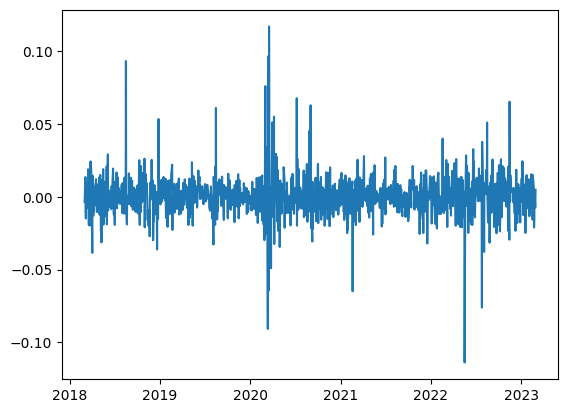

In [61]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

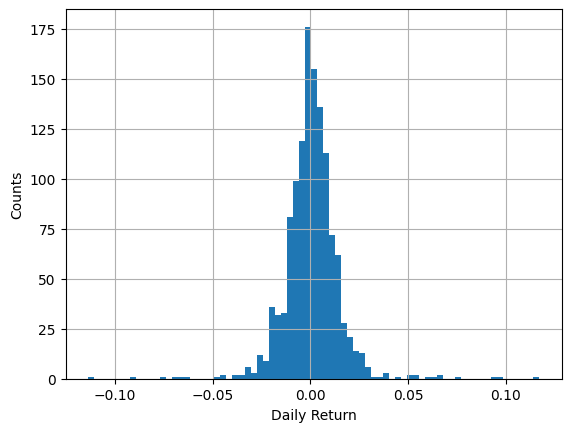

In [62]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [63]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

,Close
2018-03-31,88.020000
2018-04-30,86.896667
2018-05-31,84.376364
2018-06-30,84.618095
2018-07-31,87.097619
2018-08-31,92.981304
2018-09-30,95.435263
2018-10-31,96.523043
2018-11-30,99.585239
2018-12-31,92.007368


In [64]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

,Close,Year,Month,dayofweek,quarter
2018-03-31,88.020000,2018,March,Saturday,1
2018-04-30,86.896667,2018,April,Monday,2
2018-05-31,84.376364,2018,May,Thursday,2
2018-06-30,84.618095,2018,June,Saturday,2
2018-07-31,87.097619,2018,July,Tuesday,3
2018-08-31,92.981304,2018,August,Friday,3
2018-09-30,95.435263,2018,September,Sunday,3
2018-10-31,96.523043,2018,October,Wednesday,4
2018-11-30,99.585239,2018,November,Friday,4
2018-12-31,92.007368,2018,December,Monday,4


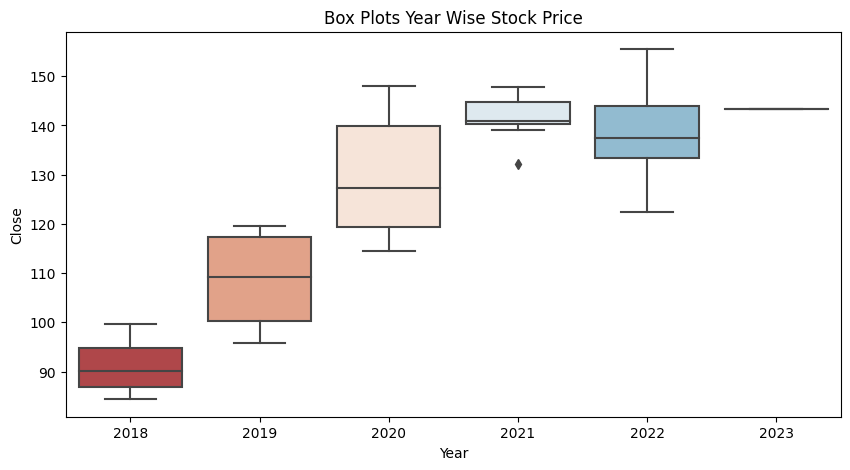

In [65]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

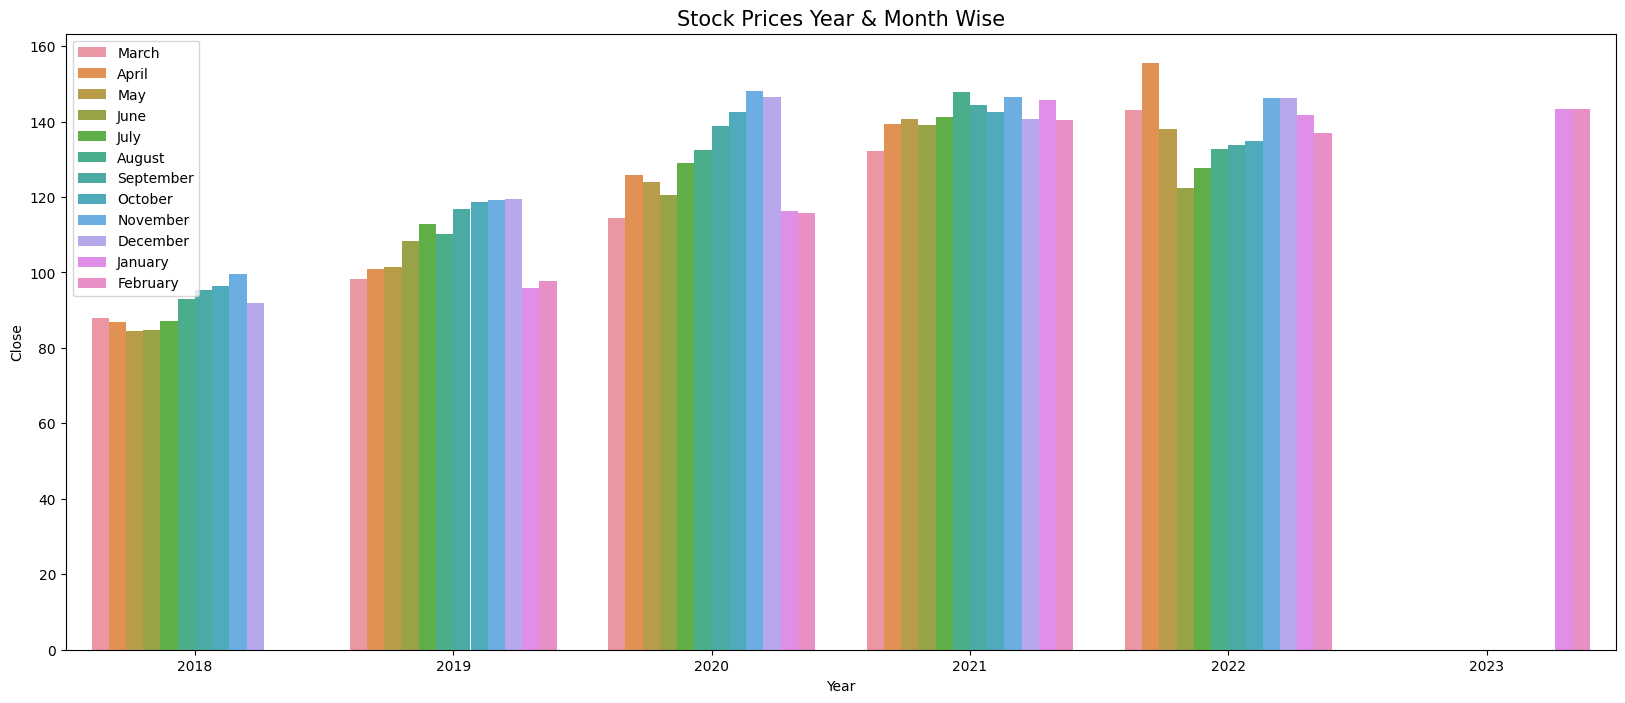

In [66]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

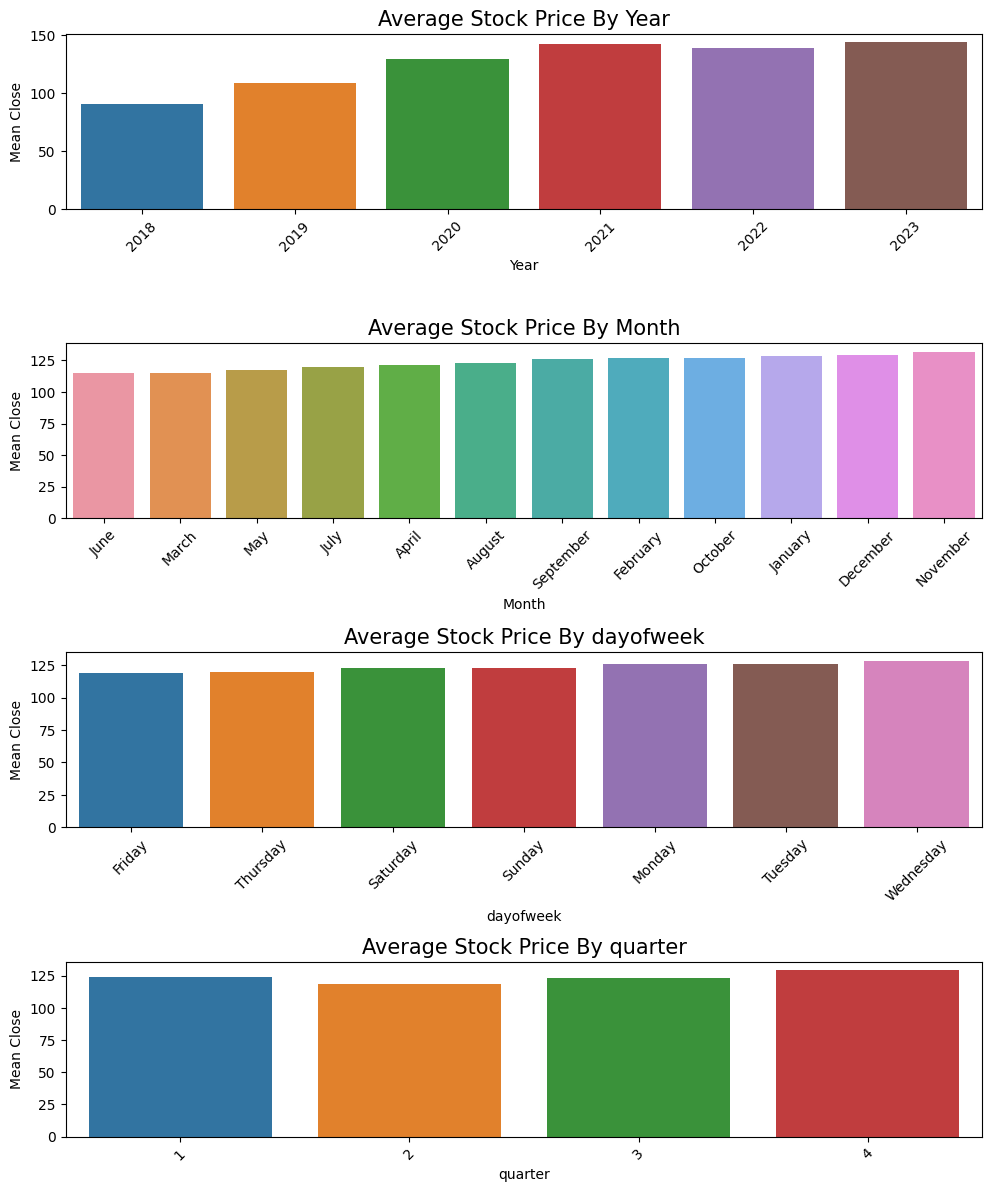

In [67]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [68]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

,Close,Volume,30MA,50MA,EMA_0.3
2018-03-01,89.080002,18909600,NaN,NaN,89.080002
2018-03-02,88.769997,19043400,NaN,NaN,88.987000
2018-03-05,89.980003,13383200,NaN,NaN,89.284901
2018-03-06,89.059998,11054700,NaN,NaN,89.217430
2018-03-07,87.739998,11453000,NaN,NaN,88.774200
...,...,...,...,...,...
2023-02-22,144.240005,9948000,143.420334,143.7778,145.330001
2023-02-23,142.089996,7340400,143.328000,143.7134,144.358000
2023-02-24,142.470001,6874500,143.206000,143.6024,143.791600
2023-02-27,141.440002,5549100,143.093667,143.4814,143.086121


### Retrieve from FRED Database (US Economics and market data)

In [69]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

,S&P500,DowJones,10Y_Treasury_Rate
2018-03-01,2677.67,8135.78,2.81
2018-03-02,2691.25,8117.68,2.86
2018-03-05,2720.94,8206.39,2.88
2018-03-06,2728.12,8213.39,2.88
2018-03-07,2726.80,8183.38,2.89
...,...,...,...
2023-02-23,4012.32,11180.26,3.88
2023-02-24,3970.04,11095.39,3.95
2023-02-27,3982.24,11141.21,3.92
2023-02-28,3970.15,11048.13,3.92


In [70]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate
2018-03-01,89.080002,18909600.0,NaN,NaN,89.080002,2677.67,8135.78,2.81
2018-03-02,88.769997,19043400.0,NaN,NaN,88.987000,2691.25,8117.68,2.86
2018-03-05,89.980003,13383200.0,NaN,NaN,89.284901,2720.94,8206.39,2.88
2018-03-06,89.059998,11054700.0,NaN,NaN,89.217430,2728.12,8213.39,2.88
2018-03-07,87.739998,11453000.0,NaN,NaN,88.774200,2726.80,8183.38,2.89
...,...,...,...,...,...,...,...,...
2023-02-23,142.089996,7340400.0,143.328000,143.7134,144.358000,4012.32,11180.26,3.88
2023-02-24,142.470001,6874500.0,143.206000,143.6024,143.791600,3970.04,11095.39,3.95
2023-02-27,141.440002,5549100.0,143.093667,143.4814,143.086121,3982.24,11141.21,3.92
2023-02-28,142.130005,6018000.0,142.988334,143.3906,142.799286,3970.15,11048.13,3.92


## TA-Lib Technical Indicators

In [71]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2018-03-01,89.080002,18909600.0,NaN,NaN,89.080002,2677.67,8135.78,2.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18909600.0
2018-03-02,88.769997,19043400.0,NaN,NaN,88.987000,2691.25,8117.68,2.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-133800.0
2018-03-05,89.980003,13383200.0,NaN,NaN,89.284901,2720.94,8206.39,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13249400.0
2018-03-06,89.059998,11054700.0,NaN,NaN,89.217430,2728.12,8213.39,2.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2194700.0
2018-03-07,87.739998,11453000.0,NaN,NaN,88.774200,2726.80,8183.38,2.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9258300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,142.089996,7340400.0,143.328000,143.7134,144.358000,4012.32,11180.26,3.88,45.429024,0.347590,0.218991,0.128599,147.620526,143.549501,139.478476,45.178051,59.136057,14.979887,6.452815e+06,-21979100.0
2023-02-24,142.470001,6874500.0,143.206000,143.6024,143.791600,3970.04,11095.39,3.95,46.466383,0.180939,0.211381,-0.030441,147.617964,143.562501,139.507037,28.407302,46.090445,14.731114,7.098057e+06,-15104600.0
2023-02-27,141.440002,5549100.0,143.093667,143.4814,143.086121,3982.24,11141.21,3.92,44.023599,-0.033854,0.162334,-0.196188,147.628757,143.469501,139.310245,24.379184,32.654846,14.316796,6.084606e+06,-20653700.0
2023-02-28,142.130005,6018000.0,142.988334,143.3906,142.799286,3970.15,11048.13,3.92,46.069022,-0.146711,0.100525,-0.247236,147.629034,143.468501,139.307968,29.129838,27.305441,13.932072,5.860290e+06,-14635700.0


In [72]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1259 non-null   float64
 1   Volume                 1259 non-null   float64
 2   30MA                   1230 non-null   float64
 3   50MA                   1210 non-null   float64
 4   EMA_0.3                1259 non-null   float64
 5   S&P500                 1259 non-null   float64
 6   DowJones               1259 non-null   float64
 7   10Y_Treasury_Rate      1259 non-null   float64
 8   RSI                    1244 non-null   float64
 9   MACD                   1225 non-null   float64
 10  MACD_Signal            1225 non-null   float64
 11  MACD_Histogram         1225 non-null   float64
 12  Upper_Bollinger_Band   1239 non-null   float64
 13  Middle_Bollinger_Band  1239 non-null   float64
 14  Lower_Bollinger_Band   1239 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [73]:
filtered_data = combined_data[49:-1]
filtered_data

,Close,Volume,30MA,50MA,EMA_0.3,S&P500,DowJones,10Y_Treasury_Rate,RSI,MACD,MACD_Signal,MACD_Histogram,Upper_Bollinger_Band,Middle_Bollinger_Band,Lower_Bollinger_Band,Stoch_K,Stoch_D,ADX,Chaikin_Osc,OBV
2018-05-10,82.690002,15857600.0,86.609000,87.1544,84.557644,2723.07,8253.22,2.97,34.930380,-0.792273,-0.375375,-0.416899,89.479333,86.558000,83.636667,18.158228,22.221941,10.969022,2.862507e+06,-31367900.0
2018-05-11,83.379997,9934800.0,86.422667,87.0404,84.204350,2727.72,8297.16,2.97,38.353021,-0.909981,-0.482296,-0.427685,89.655015,86.426000,83.196984,18.151430,18.204119,11.684483,5.122284e+06,-21433100.0
2018-05-14,84.389999,9499200.0,86.384000,86.9528,84.260045,2730.13,8294.47,3.00,43.073226,-0.911263,-0.568089,-0.343173,89.644353,86.303500,82.962647,33.213805,23.174488,11.373525,6.482506e+06,-11933900.0
2018-05-15,84.519997,9322900.0,86.308000,86.8436,84.338030,2711.45,8236.00,3.08,43.671055,-0.891511,-0.632774,-0.258738,89.477173,86.134500,82.791826,58.681063,36.682099,11.019313,7.438420e+06,-2611000.0
2018-05-16,86.129997,13733600.0,86.271666,86.7850,84.875620,2722.46,8256.76,3.09,50.591567,-0.737444,-0.653708,-0.083736,89.339785,86.062500,82.785214,83.425811,58.440226,10.634946,1.152304e+07,11122600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,144.240005,9948000.0,143.420334,143.7778,145.330001,3991.05,11134.50,3.93,50.578128,0.593931,0.186841,0.407090,147.616526,143.562001,139.507476,64.685983,67.455863,15.789934,7.888953e+06,-14638700.0
2023-02-23,142.089996,7340400.0,143.328000,143.7134,144.358000,4012.32,11180.26,3.88,45.429024,0.347590,0.218991,0.128599,147.620526,143.549501,139.478476,45.178051,59.136057,14.979887,6.452815e+06,-21979100.0
2023-02-24,142.470001,6874500.0,143.206000,143.6024,143.791600,3970.04,11095.39,3.95,46.466383,0.180939,0.211381,-0.030441,147.617964,143.562501,139.507037,28.407302,46.090445,14.731114,7.098057e+06,-15104600.0
2023-02-27,141.440002,5549100.0,143.093667,143.4814,143.086121,3982.24,11141.21,3.92,44.023599,-0.033854,0.162334,-0.196188,147.628757,143.469501,139.310245,24.379184,32.654846,14.316796,6.084606e+06,-20653700.0


In [74]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1209 entries, 2018-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  1209 non-null   float64
 1   Volume                 1209 non-null   float64
 2   30MA                   1209 non-null   float64
 3   50MA                   1209 non-null   float64
 4   EMA_0.3                1209 non-null   float64
 5   S&P500                 1209 non-null   float64
 6   DowJones               1209 non-null   float64
 7   10Y_Treasury_Rate      1209 non-null   float64
 8   RSI                    1209 non-null   float64
 9   MACD                   1209 non-null   float64
 10  MACD_Signal            1209 non-null   float64
 11  MACD_Histogram         1209 non-null   float64
 12  Upper_Bollinger_Band   1209 non-null   float64
 13  Middle_Bollinger_Band  1209 non-null   float64
 14  Lower_Bollinger_Band   1209 non-null  

In [75]:
filtered_data.describe().applymap("{0:.5f}".format).T

,count,mean,std,min,25%,50%,75%,max
Close,1209.00000,124.86699,19.80517,82.40000,110.72000,129.82001,141.87000,159.87000
Volume,1209.00000,7896407.27874,4279638.05278,2227400.00000,5447100.00000,6713200.00000,9042300.00000,44313400.00000
30MA,1209.00000,124.18546,19.79397,83.82200,110.84967,128.57100,141.50900,153.93867
50MA,1209.00000,123.72174,19.81090,84.59120,108.16200,127.85160,141.17120,150.03180
EMA_0.3,1209.00000,124.75613,19.76275,82.95589,111.23926,129.94472,141.70743,158.05376
S&P500,1209.00000,3522.61630,656.15232,2237.40000,2900.51000,3419.45000,4115.77000,4796.56000
DowJones,1209.00000,9833.69748,1397.26438,6100.31000,8625.97000,9573.56000,11284.87000,12360.33000
10Y_Treasury_Rate,1209.00000,2.06360,0.94989,0.52000,1.37000,1.84000,2.87000,4.25000
RSI,1209.00000,52.75291,11.19602,15.90841,45.72627,52.88418,60.58383,83.28111
MACD,1209.00000,0.32711,1.66558,-8.07471,-0.54773,0.36581,1.27711,4.23868


<AxesSubplot:>

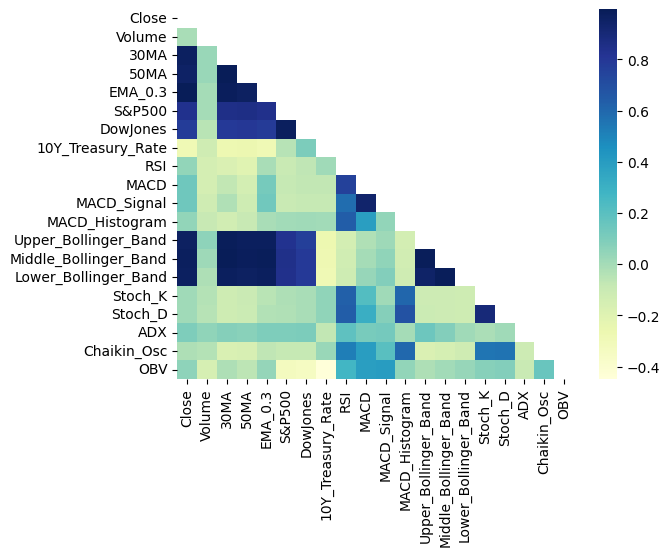

In [76]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(1209, 19)
(1209, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [78]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.4 , 0.21, 0.12, 0.07, 0.06, 0.05, 0.03, 0.02, 0.02, 0.01, 0.01,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(846, 19)
(846, 1)
(363, 19)
(363, 1)


In [80]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

1.094966627403725

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [81]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:26<00:00,  1.56it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LassoLarsIC,0.98,0.98,1.10,0.02
RANSACRegressor,0.98,0.98,1.10,0.03
TransformedTargetRegressor,0.98,0.98,1.10,0.01
LinearRegression,0.98,0.98,1.10,0.01
BayesianRidge,0.98,0.98,1.12,0.02
RidgeCV,0.98,0.98,1.13,0.01
Ridge,0.98,0.98,1.19,0.01
LassoLarsCV,0.98,0.98,1.22,0.04
HuberRegressor,0.98,0.98,1.25,0.07


# Regression & ensemble learning

In [82]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [83]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [84]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [85]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 1.565613 1.144471 0.657287 1.094967
LASSO: 8.121614 3.428841 1.745283 2.397618
RIDGE: 0.934618 0.437360 0.683591 1.193378
EN: 8.945283 3.208652 2.444570 5.127264
KNR: 10.125703 4.893849 0.995165 5.643734
CART: 7.224877 5.046462 0.000000 2.651057
SVR: 12.091411 5.962624 3.163154 8.752631
RFR: 6.368204 4.889455 0.356895 2.253647
BR: 6.533194 5.064539 0.459825 2.324425
ABR: 7.621320 5.345743 1.559878 2.962344
GBR: 7.077754 5.060247 0.405912 2.214109
ETR: 6.711207 5.004165 0.000000 2.528607
XGB: 7.027963 5.086467 0.030579 2.765238
LGBM: 7.269017 5.046263 0.243561 2.192377
CBR: 9.605295 6.074182 0.142182 5.766211
MLP: 75.361770 19.780418 16.723949 50.386181


In [86]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

,CV_mean,CV_std,Train_RMSE,Test_RMSE
Names,,,,
LR,1.57,1.14,0.66,1.09
LASSO,8.12,3.43,1.75,2.40
RIDGE,0.93,0.44,0.68,1.19
EN,8.95,3.21,2.44,5.13
KNR,10.13,4.89,1.00,5.64
CART,7.22,5.05,0.00,2.65
SVR,12.09,5.96,3.16,8.75
RFR,6.37,4.89,0.36,2.25
BR,6.53,5.06,0.46,2.32


#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

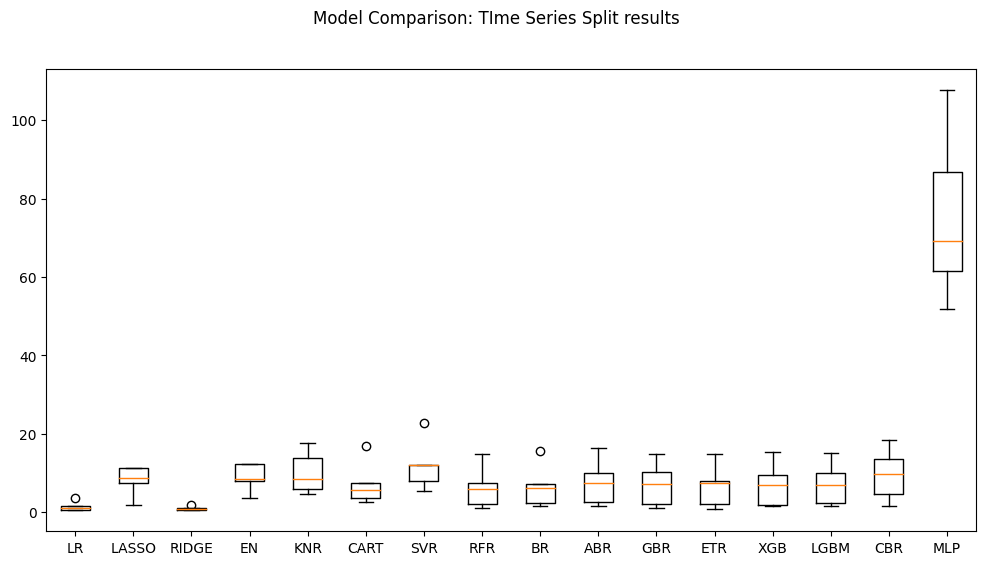

In [87]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [88]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

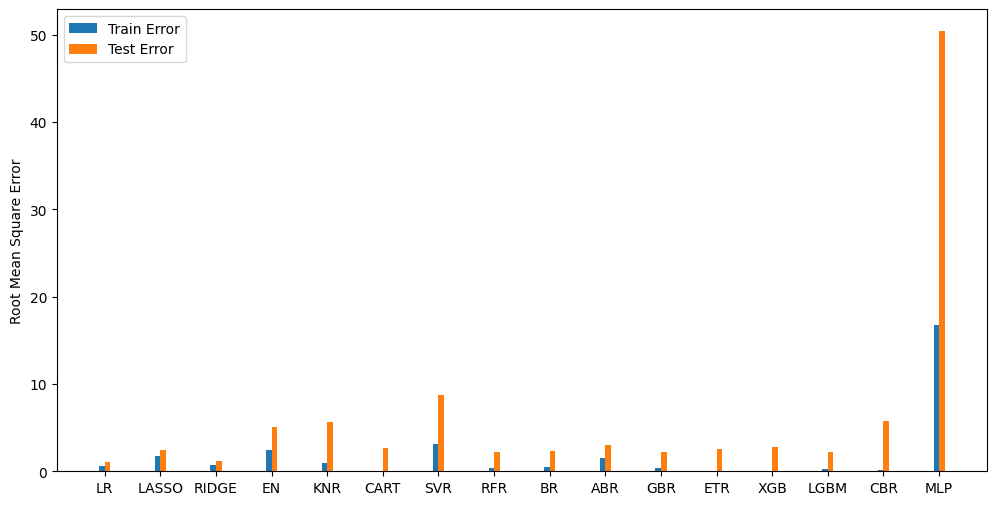

In [89]:
plot_models_RMSE()

# ARIMA

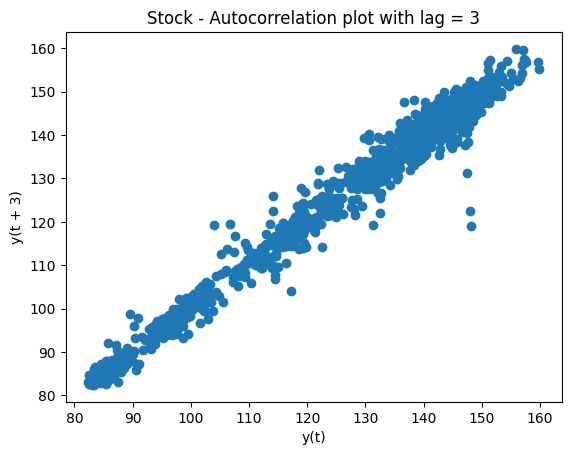

In [90]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [91]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [92]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-2.085691095303981, 0.2503070726667337, 9, 1199, {'1%': -3.4358156841149765, '5%': -2.8639535605738278, '10%': -2.568055023174024}, 4762.003934391261) 

ADF Statistic: -2.085691095303981
n_lags: 0.2503070726667337
p-value: 0.2503070726667337
Critial Values:
   1%, -3.4358156841149765
Critial Values:
   5%, -2.8639535605738278
Critial Values:
   10%, -2.568055023174024
	1%: -3.436
	5%: -2.864
	10%: -2.568

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

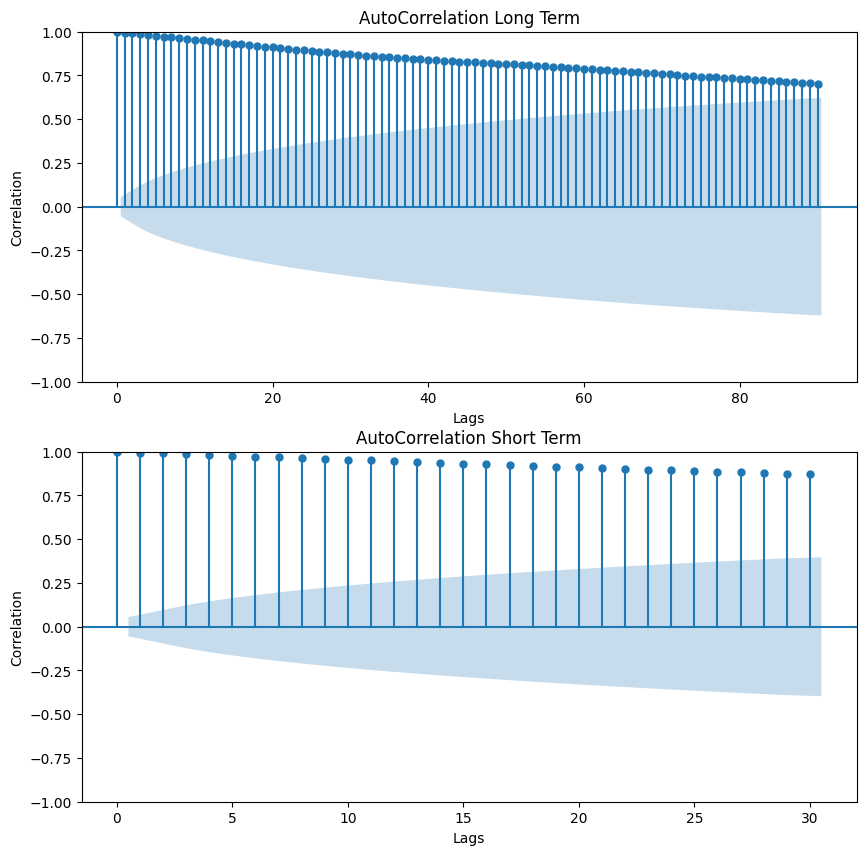

In [93]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

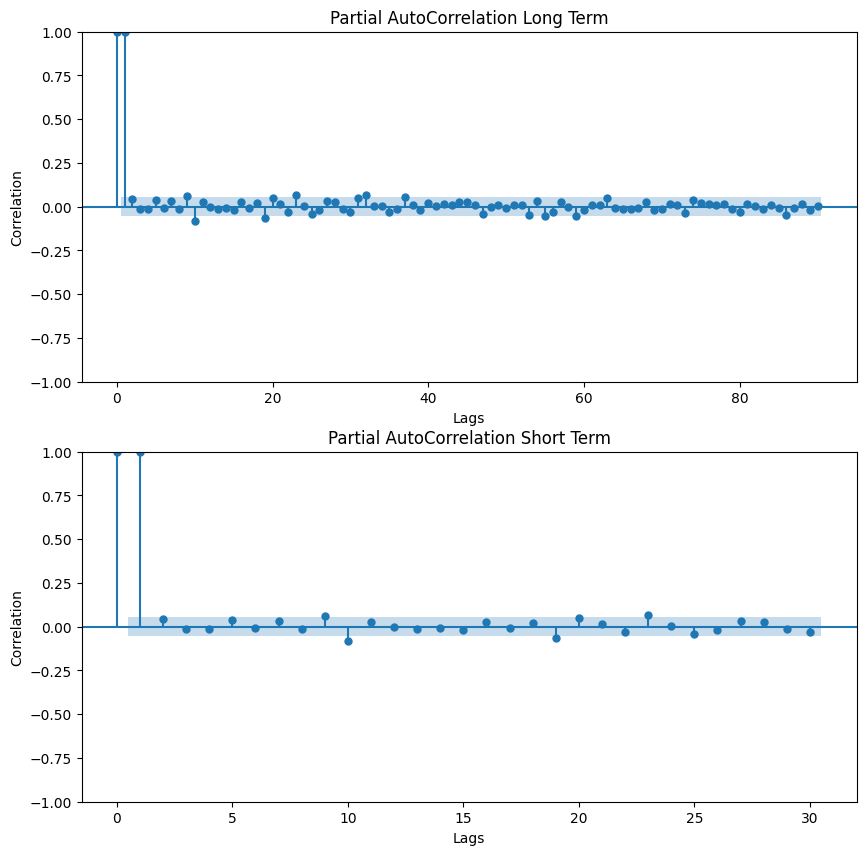

In [94]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

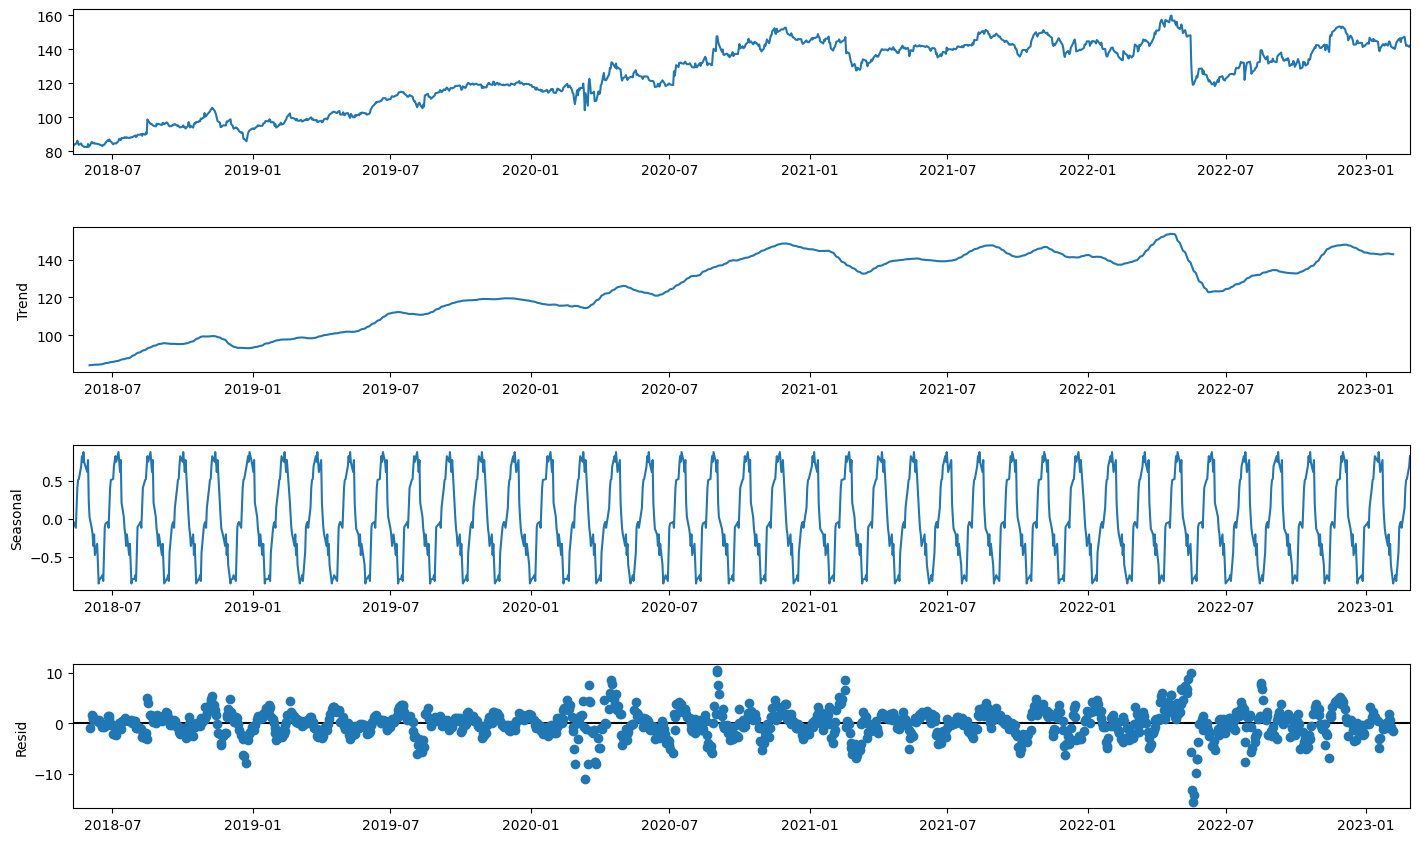

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [96]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 19.76898 | Test RMSE: 23.03169
Model (0, 0, 1) | Train RMSE: 10.48345 | Test RMSE: 32.10552
Model (0, 0, 2) | Train RMSE: 6.74397 | Test RMSE: 36.20632
Model (0, 1, 0) | Train RMSE: 3.28772 | Test RMSE: 42.94585
Model (0, 1, 1) | Train RMSE: 3.27715 | Test RMSE: 42.95783
Model (0, 1, 2) | Train RMSE: 3.27565 | Test RMSE: 42.95322
Model (0, 2, 0) | Train RMSE: 4.04901 | Test RMSE: 42.79093
Model (0, 2, 1) | Train RMSE: 3.57345 | Test RMSE: 42.73989
Model (0, 2, 2) | Train RMSE: 3.56342 | Test RMSE: 42.73512
Model (1, 0, 0) | Train RMSE: 2.00976 | Test RMSE: 42.26871
Model (1, 0, 1) | Train RMSE: 2.03328 | Test RMSE: 42.28478
Model (1, 0, 2) | Train RMSE: 2.03208 | Test RMSE: 42.27647
Model (1, 1, 0) | Train RMSE: 3.27627 | Test RMSE: 42.95693
Model (1, 1, 1) | Train RMSE: 3.27611 | Test RMSE: 42.95585
Model (1, 1, 2) | Train RMSE: 3.27564 | Test RMSE: 42.95299
Model (1, 2, 0) | Train RMSE: 3.76220 | Test RMSE: 42.78110
Model (1, 2, 1) | Train RMSE: 3.56262 

In [99]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 19.76898 | Test RMSE: 23.03169
Model (0, 0, 1) | Train RMSE: 10.48345 | Test RMSE: 23.00968
Model (0, 0, 2) | Train RMSE: 6.74397 | Test RMSE: 22.98356
Model (0, 1, 0) | Train RMSE: 3.28772 | Test RMSE: 10.11765
Model (0, 1, 1) | Train RMSE: 3.27715 | Test RMSE: 10.13454
Model (0, 1, 2) | Train RMSE: 3.27565 | Test RMSE: 10.14642
Model (0, 2, 0) | Train RMSE: 4.04901 | Test RMSE: 59.00772
Model (0, 2, 1) | Train RMSE: 3.57345 | Test RMSE: 22.01118
Model (0, 2, 2) | Train RMSE: 3.56342 | Test RMSE: 21.98302
Model (1, 0, 0) | Train RMSE: 2.00976 | Test RMSE: 10.40377
Model (1, 0, 1) | Train RMSE: 2.03328 | Test RMSE: 9.08334
Model (1, 0, 2) | Train RMSE: 2.03208 | Test RMSE: 9.29220
Model (1, 1, 0) | Train RMSE: 3.27627 | Test RMSE: 10.13870
Model (1, 1, 1) | Train RMSE: 3.27611 | Test RMSE: 10.13964
Model (1, 1, 2) | Train RMSE: 3.27564 | Test RMSE: 10.14696
Model (1, 2, 0) | Train RMSE: 3.76220 | Test RMSE: 9.39039
Model (1, 2, 1) | Train RMSE: 3.56262 | T

In [100]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

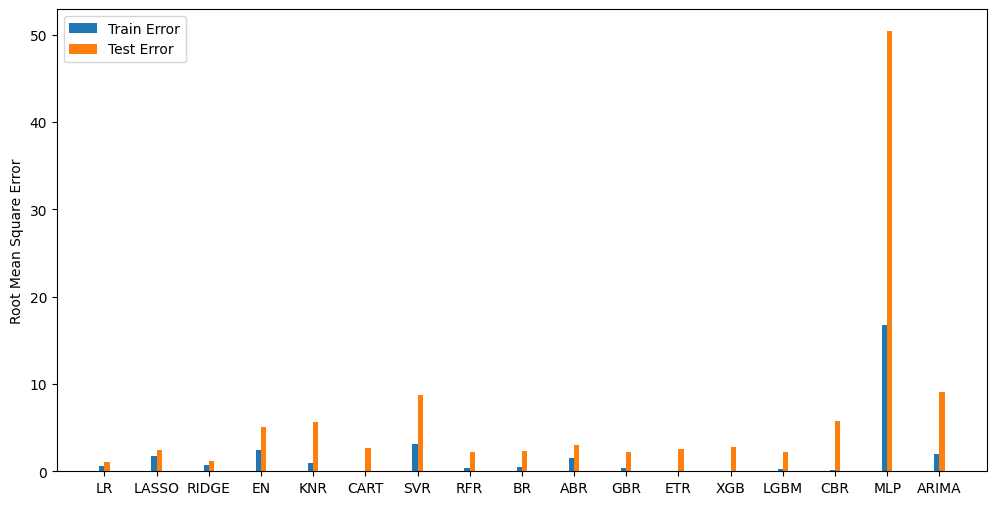

In [101]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [102]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  846
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1616.917
Date:                Tue, 28 Mar 2023   AIC                           3241.834
Time:                        18:31:40   BIC                           3260.796
Sample:                             0   HQIC                          3249.099
                                - 846                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.0852     18.685      6.320      0.000      81.463     154.707
ar.L1          0.9985      0.002    407.126      0.000       0.994       1.003
ma.L1         -0.1521      0.017     -9.018      0.0

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10504.912, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3243.235, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3265.561, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3242.101, Time=0.40 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8345.032, Time=0.55 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3241.298, Time=0.76 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3230.118, Time=0.53 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3236.426, Time=0.61 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=3229.528, Time=0.79 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=3235.328, Time=0.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=3241.350, Time=1.58 sec

Best model:  ARIMA(3,0,3)(0,0,0)[0]          
Total fit time: 6.710 seconds
                               

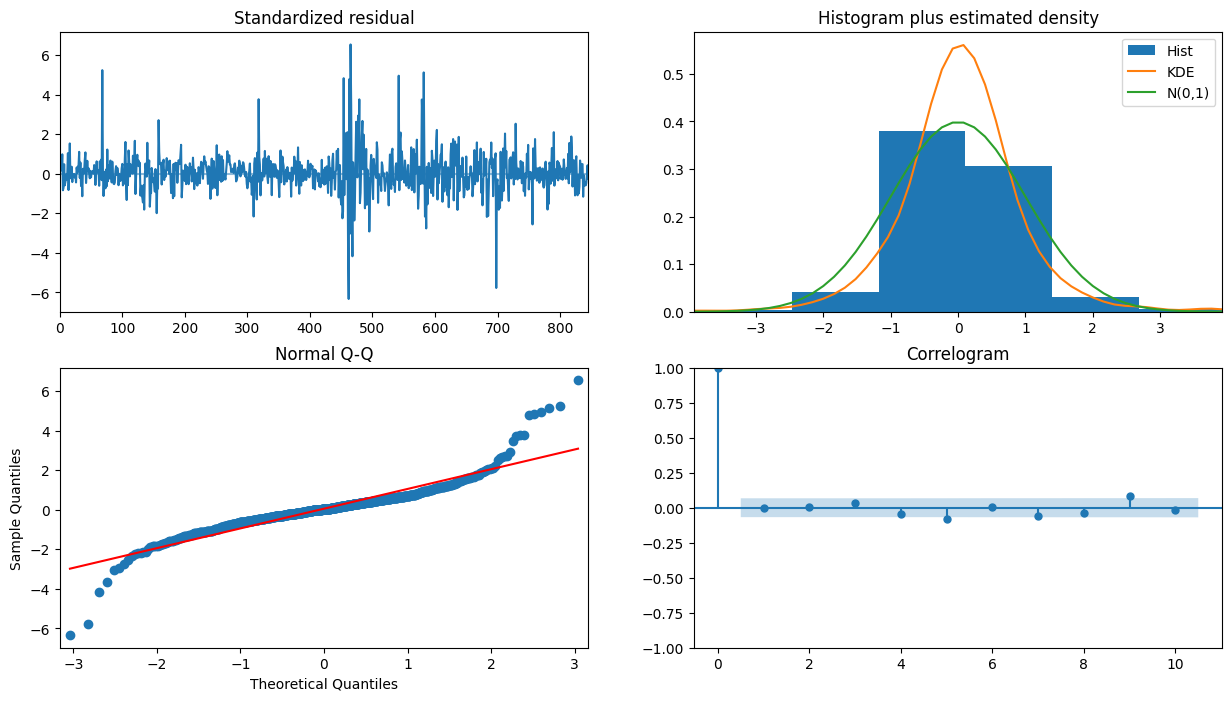

In [103]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [104]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [105]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(880, 1)
(378, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [106]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (869, 10)
trainY.shape =  (869,)
testX.shape =  (367, 10)
testY.shape =  (367,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [107]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([869, 10, 1])
trainY.shape =  torch.Size([869, 1])
testX.shape =  torch.Size([367, 10, 1])
testY.shape =  torch.Size([367, 1])


In [108]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [109]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [110]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [111]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.1486
Epoch: 20/100, Loss: 0.1045
Epoch: 30/100, Loss: 0.0639
Epoch: 40/100, Loss: 0.0475
Epoch: 50/100, Loss: 0.0444
Epoch: 60/100, Loss: 0.0423
Epoch: 70/100, Loss: 0.0415
Epoch: 80/100, Loss: 0.0393
Epoch: 90/100, Loss: 0.0454
Epoch: 100/100, Loss: 0.0463


In [112]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

       0
0 121.31
1 122.29
2 121.27
3 121.57
4 121.70
       0
0 121.91
1 122.32
2 122.52
3 122.07
4 122.08

LSTM Train RMSE: 1.9257644


#### Plotting the error loss of all epochs

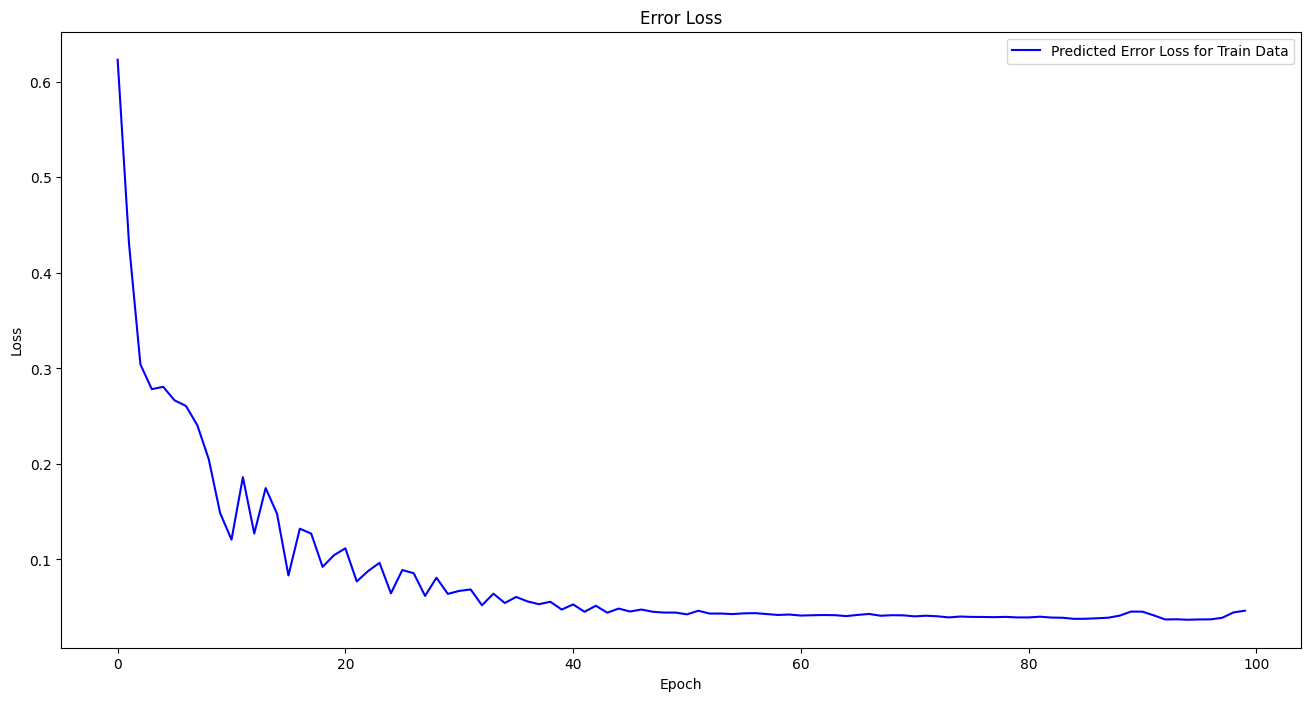

In [113]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

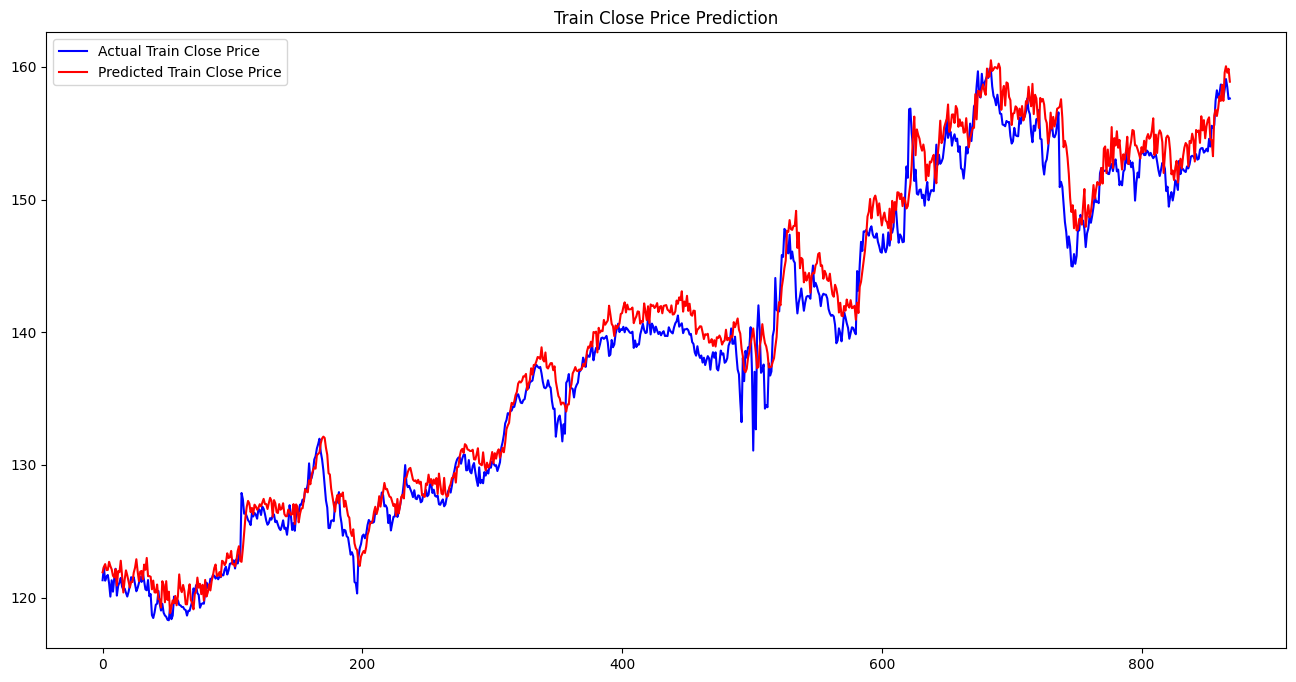

In [114]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [115]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

       0
0 145.06
1 144.30
2 144.55
3 145.03
4 144.73
       0
0 146.45
1 145.97
2 145.38
3 144.83
4 144.45

1.9257644


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [116]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

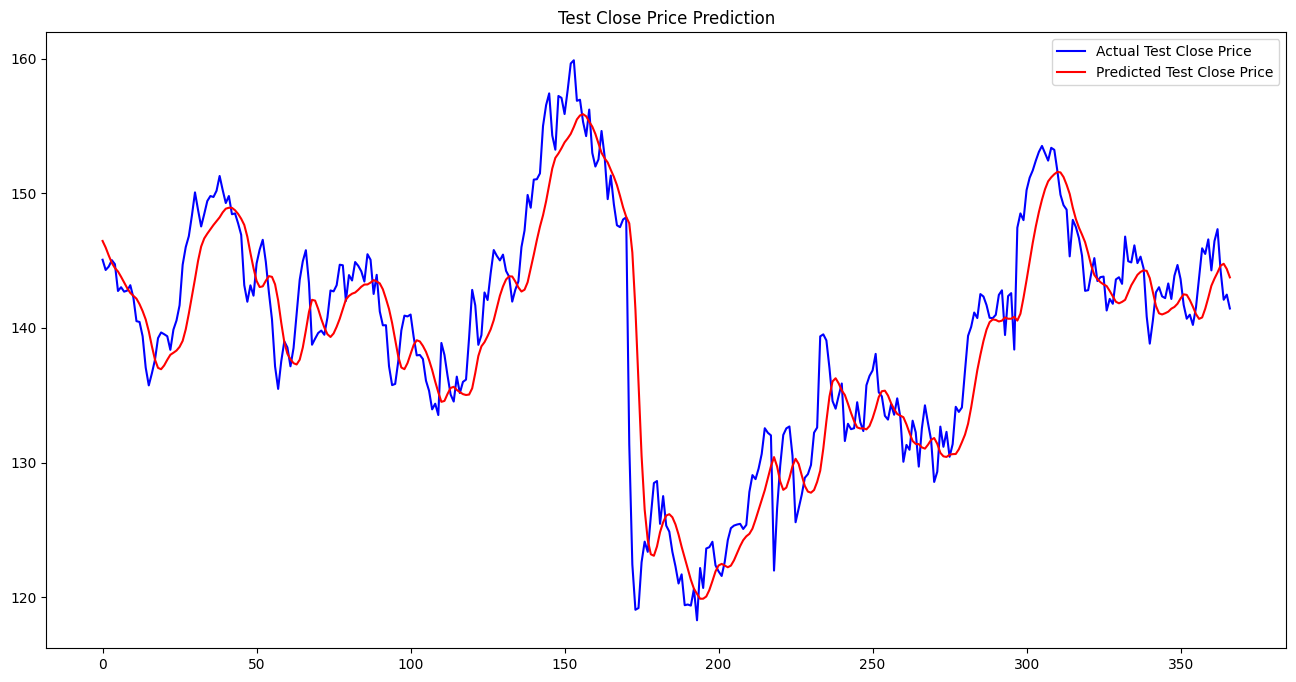

In [117]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [118]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

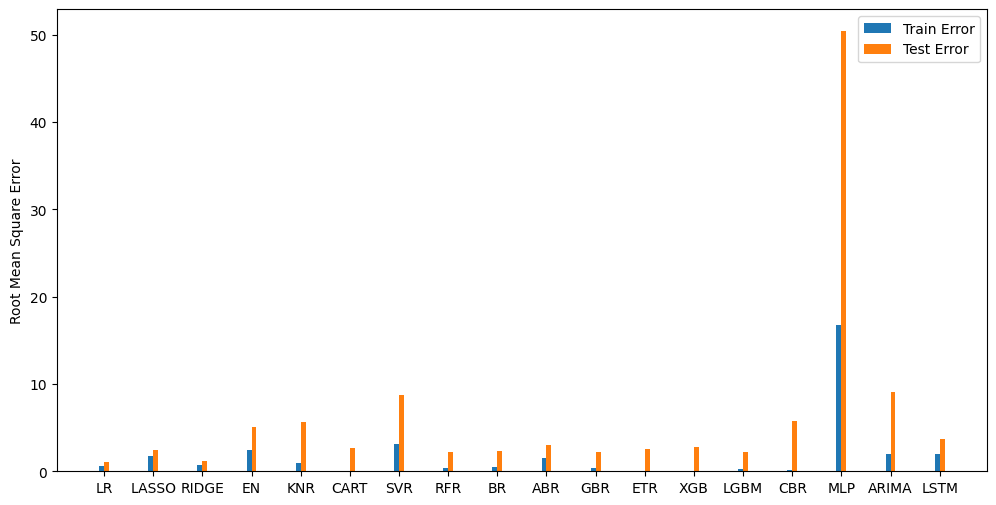

In [119]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.